### This file is for BEFORE Google Colab updated on 2023-07-21
Important things to note:
1. Colab's Ubuntu upgraded from 20.04 LTS to 22.04 LTS
2. Colab's Cuda upgraded, and downgrading it was impossible due to Ubuntu's upgrade.

These changes broke the previous GPU-enabled MXNet version I used, `mxnet-cu110`, because I could not downgrade Cuda.

### Therefore, the **old notebooks may not run completely** due to notebook cells that attempt to downgrade Cuda.

# Shorter list of commands to install Cuda 10.0 and mxnet-cu110

https://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html

In [1]:
# expecting 11.8 for me (before the uninstalling)
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-docker2' for glob 'nvidia*'
Note, selecting 'nvidia-headless-525-server' for glob 'nvidia*'
Note, selecting 'nvidia-headless-530-open' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-530-open' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-headless-no-dkms-515-open' for glob 'nvidia*'
Note, 

In [3]:
#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb

--2023-06-21 18:09:53--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2942 (2.9K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’

cuda-repo-ubuntu180 100%[===================>]   2.87K  --.-KB/s    in 0s      

2023-06-21 18:09:53 (170 MB/s) - ‘cuda-repo-ubuntu1804_10.0.130-1_amd64.deb’ saved [2942/2942]



In [4]:
#install CUDA kit dpkg
!yes | dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0

Selecting previously unselected package cuda-repo-ubuntu1804.
(Reading database ... 121413 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1804_10.0.130-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1804 (10.0.130-1) ...
Setting up cuda-repo-ubuntu1804 (10.0.130-1) ...

Configuration file '/etc/apt/sources.list.d/cuda.list'
 ==> File on system created by you or by a script.
 ==> File also in package provided by package maintainer.
   What would you like to do about it ?  Your options are:
    Y or I  : install the package maintainer's version
    N or O  : keep your currently-installed version
      D     : show the differences between the versions
      Z     : start a shell to examine the situation
 The default action is to keep your current version.
*** cuda.list (Y/I/N/O/D/Z) [default=N] ? Installing new version of config file /etc/apt/sources.list.d/cuda.list ...

The public CUDA GPG key does not appear to be installed.
To install the key, run this comm

In [5]:
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update

--2023-06-21 18:18:29--  http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.199.39.144
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.199.39.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2926 (2.9K) [application/x-deb]
Saving to: ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’

nvidia-machine-lear 100%[===================>]   2.86K  --.-KB/s    in 0s      

2023-06-21 18:18:29 (337 MB/s) - ‘nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb’ saved [2926/2926]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-machine-learning-repo-ubuntu1804' instead of './nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb'
The following NEW packages will be installed:
  nvidi

In [6]:
# This actually solved the libcudnn.so.7 issue for me
# !sudo apt-get install libcudnn7=[cudnn_version+cuda_version]
# !sudo apt-get install libcudnn7=7.6.5+10.0.130
!sudo apt-get install libcudnn7=7.4.1.5-1+cuda10.0
# !sudo apt-get install libcudnn7-devel=7.4.1.5-1+cuda10.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcudnn7
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 149 MB of archives.
After this operation, 348 MB of additional disk space will be used.
Get:1 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  libcudnn7 7.4.1.5-1+cuda10.0 [149 MB]
Fetched 149 MB in 2s (98.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libcudnn7.
(Reading database 

In [7]:
# expecting 10.0 (V10.0.130) now
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [8]:
# latest available for this, 1.9.0
!pip install mxnet-cu100

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


Validating similar to https://mxnet.apache.org/versions/1.9.1/get_started/validate_mxnet.html

In [9]:
import mxnet as mx
print('number of gpus, expecting 1:',  mx.context.num_gpus())  # 1 gpu
a = mx.nd.ones((2, 3), mx.gpu())
b = a * 2 + 1
print(b.asnumpy())

number of gpus, expecting 1: 1
[[3. 3. 3.]
 [3. 3. 3.]]


In [10]:
print(b)  # should show it's on the gpu with @gpu(0)
print('numpy dtype:', b.asnumpy().dtype)  # should be float32


[[3. 3. 3.]
 [3. 3. 3.]]
<NDArray 2x3 @gpu(0)>
numpy dtype: float32


In [11]:
del a, b

In [23]:
import mxnet as mx
import numpy as np
from mxnet import npx
from mxnet.gluon import nn, rnn
npx.set_np()
from mxnet import gluon
from mxnet import autograd

import time
import math

In [ ]:
# specify a context
ctx = mx.cpu()

In [24]:
# WE CAN DO GPU NOW!
ctx = mx.gpu()

# Now going to observe speed of it training on SimpleDataSet like the CPU one did

In [ ]:
import mxnet as mx
import numpy as np
from mxnet import npx
from mxnet.gluon import nn, rnn
npx.set_np()
from mxnet import gluon
from mxnet import autograd

import time
import math

#SimpleDataSet (basic 1-feature series)

creating basic data set
data.tau: 7        (amount of past observations to train with)
data.batch_size: 8
data set training dataloader sample:
[array([[-0.35507157, -0.33501386, -0.31092382, -0.30697588, -0.31622174,
        -0.25373792, -0.2804673 ],
       [-1.00922559, -1.004511  , -0.90647922, -1.00860871, -0.95396942,
        -0.98264026, -0.98049554],
       [ 1.00154597,  0.96963585,  1.01875472,  0.94535869,  0.9529692 ,
         1.03560633,  0.99358756],
       [-0.98861861, -0.88780732, -0.9098539 , -0.86657761, -0.89694233,
        -0.97488614, -0.90640173],
       [-0.90640173, -0.91488369, -0.93924721, -0.90043235, -0.87929292,
        -0.87456387, -0.89039259],
       [-0.38942979, -0.34560859, -0.36183302, -0.37358057, -0.41672692,
        -0.47661371, -0.41293837],
       [-0.69131378, -0.70794829, -0.76308923, -0.73614291, -0.76401309,
        -0.78674861, -0.74495302],
       [-1.03754548, -1.03460325, -0.94911144, -0.96277597, -0.99843936,
        -1.09692423, -0.992

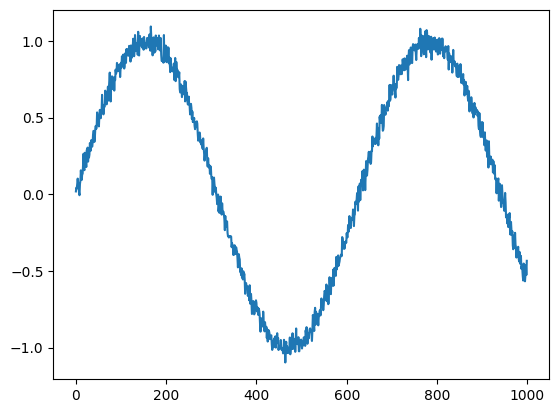

plotting another with no noise:


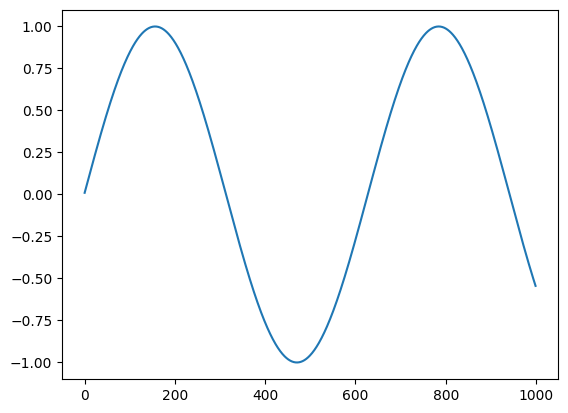

In [36]:
import mxnet as mx
import numpy as np
from mxnet import npx
# from mxnet.gluon import nn, rnn
npx.set_np()


# adapted from https://d2l.ai/chapter_recurrent-neural-networks/sequence.html#training

class SimpleDataSet():

    def __init__(self, fn='sine', random_factor=0.2, batch_size=8, seq_length=7, num_samples=1000, num_train=600):
        '''fn = `'sine'`, `'exp'`, `'linear'`, `'quad'`, or a custom function that accepts parameters `(time, T)` where `time` is an array [1 to T+1] and `T` is `num_samples`'''
        self.batch_size = batch_size

        self.T = num_samples
        self.tau = seq_length  # past observations amount

        assert num_train <= num_samples, \
            'num_train must be <= num_samples'
        self.num_train = num_train

        self.time = np.arange(1, self.T + 1, dtype=np.float32)
        if fn == 'sine':
            ## sin wave with slight noise
            self.x = np.sin(0.01 * self.time) + np.random.randn(self.T) * 0.2 * random_factor
        elif fn == 'exp':
            ## exponential curve with slight noise
            self.x = np.power(0.1*( self.time - 0.5 + 4*random_factor*np.random.randn(self.T) ), 2)
        elif fn == 'linear':
            self.x = np.array(self.time) + 4*random_factor*np.random.randn(self.T)
        elif fn == 'quad':
            ## quadratic curve with slight noise
            self.x = self.time + np.power(self.time,2) + 4*random_factor*np.random.randn(self.T)

        else:
            self.x = fn(self.time, self.T)


    def get_tensorloader(self, tensors, train, indices=slice(0, None))   -> mx.gluon.data.DataLoader:
        # argument `tensors` would be like [features, labels]
        tensors = tuple(a[indices] for a in tensors)
        # print('tensors:')
        # print(tensors)
        # print(f'tensors shape: {tuple(a.shape for a in tensors)}')
        # print(f'raw self.x shape: {self.x.shape}')
        # print(f'self.features shape: {self.features.shape}')
        # print(f'self.labels shape: {self.labels.shape}')
        # exit()
        dataset = mx.gluon.data.ArrayDataset(*tensors)
        return mx.gluon.data.DataLoader(dataset, self.batch_size,
                                    shuffle=train)


    def get_dataloader(self, train)   -> mx.gluon.data.DataLoader:
        features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
        self.features = np.stack(features, 1)
        self.labels = self.x[self.tau:].reshape((-1, 1))
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)



if __name__ == '__main__':
    ## Code to do testing, if this file is ran directly

    print('creating basic data set')
    data = SimpleDataSet()
    # data = SimpleDataSet(fn='quad')
    # data = SimpleDataSet(fn='sine')
    print(f'data.tau: {data.tau}        (amount of past observations to train with)')
    print(f'data.batch_size: {data.batch_size}')

    # get a training dataloader from the dataset
    dataloader = data.get_dataloader(train=True)

    # get a sample batch of X, y from the dataloader
    dataloader_sample = next(iter(dataloader))
    print('data set training dataloader sample:')
    print(dataloader_sample)
    print(f'that sample\'s [X, y] shapes: {[arr.shape for arr in dataloader_sample]}')

    # plot the raw data points
    import matplotlib.pyplot as plt
    print('plotting graph of the raw data points data.x')
    plt.plot(data.x)
    plt.show()

    print('plotting another with no noise:')
    plt.plot(SimpleDataSet('sine',random_factor=0).x)
    plt.show()

# Utility Functions (create net, train and validation, graphing)

## create_net

create_net(hidden_size=..., num_layers=...) defined here.

Creates a Sequential net, of an LSTM and a Dense at the end

The smaller number of layers was inspired by [this SO question/answer](https://ai.stackexchange.com/questions/3156/how-to-select-number-of-hidden-layers-and-number-of-memory-cells-in-an-lstm)

In [25]:
def create_net(hidden_size=32, num_layers=3, _out_dense_units=1):

  ## create net
  net = nn.Sequential()

  # use net's name_scope to give child Blocks appropriate names.
  with net.name_scope():

    # LSTM
    #  default layout is 'TNC', but 'NTC' avoids having to transpose the tensors before passing through
    #   'TNC' corresponds to input tensor shape (seq_length, batch_size, num_inputs)
    # note: LSTM has arguments state_clip_min and state_clip_max but they aren't working on cpu mxnet
    # lstm_layer = rnn.LSTM(hidden_size=10, num_layers=3, layout='NTC')
    lstm_layer = rnn.LSTM(hidden_size=hidden_size, num_layers=num_layers, layout='NTC')
    net.add(lstm_layer)

    # Dense:
    #  Inputs:  if flatten is True, data should be a tensor with shape (batch_size, x1, x2, ..., xn), where x1 * x2 * ... * xn is equal to in_units.
    #  Outputs:  if flatten is True, out will be a tensor with shape (batch_size, units).
    out_layer = nn.Dense(units=_out_dense_units, flatten=True)
    net.add(out_layer)

  return net


## save_net_to_file

In [26]:
_DRIVE_ROOT_FLDR = 'drive/MyDrive/Colab Notebooks/'
def save_net_to_file(net, filename, filefolder='params'):
    # generate bash command arguments
    file_path = filefolder + '/' + filename
    repr_rel_folder = '.' if (not filefolder or len(filefolder)==0) else repr('./' + filefolder)
    # save
    net.save_parameters(file_path)
    # copy out to drive and back
    !cp {repr(file_path)} {repr(_DRIVE_ROOT_FLDR + file_path)}
    !cp {repr(_DRIVE_ROOT_FLDR + file_path)} {repr_rel_folder}
    print(f'saved parameters to "{file_path}"')


# save_net_to_file(net, "test_net_2.params")

## train with validation
```
train(model, trainer,
    train_dataloader, loss_fn,
    num_epochs, test_dataloader)
```



### Note: removed the nan test emergency stop for sake of efficiency and removing inadvertent asnumpy() calls in this GPU context

In [27]:
## put testing into train function

def train(model: nn.Block, trainer: gluon.Trainer, train_dataloader,
          loss_fn, num_epochs,
          test_dataloader=None,
          save_every: int = 0, save_filename_template = 'filename_e{epoch}_tloss{tloss:.7f}_vloss{vloss:.7f}.params',
          _gradient_clip = True,
          _dtype_cast=True,
          _verbosedbg=True):
    '''returns list of training losses for each epoch.
    <br>save_filename_template gets passed args `epoch`, `tloss`, `vloss`.'''

    _do_saving = save_every > 0
    # _save_at = save_every - 1   # testing if _save_at == epoch % save_every

    train_losses = []
    test_losses = []
    train_start_time = time.time()

    for epoch in range(num_epochs):

        train_start_time = time.time()  # moved this from bottom to top of for-loop

        # keep a sum for averaging this epoch's loss
        epoch_loss_sum = 0.
        epoch_losses = []

        # Iterate over training data
        for idx, (batch, label) in enumerate(train_dataloader):

            if len(batch.shape) < 3:
              batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
            if _dtype_cast:
              batch = batch.astype('float32')

            batch = batch.as_in_context(ctx)
            label = label.as_in_context(ctx)

            batch_size = batch.shape[0]

            with autograd.record():  # train_mode defaults to True

                ## Forward pass
                predicted = model(batch)

                ## Compute loss
                loss: mx.numpy.ndarray = loss_fn(predicted, label)

                if idx == 0:  # first run of loop
                  if _verbosedbg or (epoch == 0):  # print structure only once if verbose debug is False
                    # get a preview
                    # also set _params_prefix, used for debug messages later
                    print('weight params:', model.collect_params('.*weight'))
                    _params_prefix = model.collect_params('.*weight')._prefix

                # ## my emergency debug stop if nan is found    # <------- SOMETHING here in the any(...) calling asnumpy() ?
                # if math.isnan(loss[0]) \
                #             or any(math.isnan(i) for i in loss) \
                #             or math.isnan(model.collect_params('.*weight')[_params_prefix+'lstm0_l0_h2h_weight']._grad[0].min()) \
                #             :
                #     print()
                #     print(f'DEBUG force stopping at epoch {epoch} idx {idx}')
                #     print(f'epoch_loss_sum: {epoch_loss_sum}')
                #     print('loss:', loss)
                #     print('train_losses array:', train_losses)
                #     print('\nDEBUG more info:')
                #     print(f'batch: {batch}')
                #     print(f'label: {label}')
                #     print(f'predicted: {predicted}')
                #     print(f'some weights data and grads, BEFORE loss.backward()  (the _grad is not updated yet):')
                #     _i2h_weight = model.collect_params('.*weight')[_params_prefix+'lstm0_l0_i2h_weight']
                #     _i2h_weight_data = _i2h_weight._data.copy()
                #     _i2h_weight_grad = _i2h_weight._grad.copy()
                #     print('  ',_i2h_weight)
                #     print(f'    i2h _data shape: {_i2h_weight_data[0].shape}  |  [0]  min() {_i2h_weight_data[0].min()} , max() {_i2h_weight_data[0].max()}')
                #     print(f'    i2h _grad shape: {_i2h_weight_grad[0].shape}  |  [0]  min() {_i2h_weight_grad[0].min()} , max() {_i2h_weight_grad[0].max()}')
                #     _h2h_weight = model.collect_params('.*weight')[_params_prefix+'lstm0_l0_h2h_weight']
                #     _h2h_weight_data = _h2h_weight._data.copy()
                #     _h2h_weight_grad = _h2h_weight._grad.copy()
                #     print('  ',_h2h_weight)
                #     print(f'    h2h _data shape: {_h2h_weight_data[0].shape}  |  [0]  min() {_h2h_weight_data[0].min()} , max() {_h2h_weight_data[0].max()}')
                #     print(f'    h2h _grad shape: {_h2h_weight_grad[0].shape}  |  [0]  min() {_h2h_weight_grad[0].min()} , max() {_h2h_weight_grad[0].max()}')
                #     print(f' again, epoch {epoch} idx {idx}')
                #     # exit to stop (the program keeps saying nan afterwards if you let it run)
                #     raise RuntimeError("nan encountered. See debug info printed above this error")


                # store loss
                # epoch_loss_sum += float(loss.mean())    # <---- this float is calling asnumpy()?  __float__() > item() > asnumpy()?
                epoch_losses.append(loss)

                ## Backward pass  (gradients get updated)
                #  Note: The gradients didn't seem to update if this was outside autograd.record()
                #   which contradicts many examples
                loss.backward()

                # print('checking params...')
                # print('----')
                # print(model.collect_params('.*weight')[_params_prefix+'lstm0_l0_i2h_weight'].__dict__)
                # print('----')
                # print('grad_req for that Parameter:', model.collect_params('.*weight')[_params_prefix+'lstm0_l0_i2h_weight'].grad_req)
                # print('----')
                # print('autograd is_training:', autograd.is_training())
                # exit()

            # end autograd.record scope


            ## Optimize i.e. step the trainer

            if not _gradient_clip:
                trainer.step(batch_size)

            elif _gradient_clip:
                # attempt to perform gradient clipping
                if _verbosedbg: print(f' performing gradient clipping (epoch {epoch} idx {idx}, batch_size = batch.shape[0] = {batch_size})...')
                trainer.allreduce_grads()
                # https://github.com/apache/mxnet/issues/11508
                grads = [i.grad(ctx).as_nd_ndarray() for i in model.collect_params().values() if i._grad is not None]
                _total_norm = gluon.utils.clip_global_norm(arrays=grads, max_norm=1)
                if _verbosedbg: print(f'  debug: clip_global_norm\'s total norm was {_total_norm}')
                # https://nlp.gluon.ai/examples/language_model/train_language_model.html
                trainer.update(batch_size=batch_size)
                # trainer.update(batch_size=1)
                # trainer.step(1)

        # end for idx and batches (train)

        train_elapsed = time.time() - train_start_time

        # train_losses.append(epoch_loss_sum/(idx+1))
        epoch_loss_sum = sum(float(loss.mean()) for loss in epoch_losses)
        train_losses.append(epoch_loss_sum/(idx+1))

        ## start testing, if applicable

        if test_dataloader:

            test_start_time = time.time()

            test_epoch_loss_sum = 0.
            test_epoch_losses = []

            # Iterate over test data
            for t_idx, (batch, label) in enumerate(test_dataloader):

                if len(batch.shape) < 3:
                  batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
                if _dtype_cast:
                  batch = batch.astype('float32')

                batch = batch.as_in_context(ctx)
                label = label.as_in_context(ctx)

                batch_size = batch.shape[0]

                # with autograd.record():  # train_mode defaults to True

                ## Forward pass
                predicted = model(batch)

                ## Compute loss
                loss: mx.numpy.ndarray = loss_fn(predicted, label)

                # store loss
                # test_epoch_loss_sum += float(loss.mean())  # <---- this float is calling asnumpy()?  __float__() > item() > asnumpy()?
                test_epoch_losses.append(loss)

            # end for idx and batches (test)

            test_elapsed = time.time() - test_start_time

            # test_losses.append(test_epoch_loss_sum/(t_idx+1))
            test_epoch_loss_sum = sum(float(loss.mean()) for loss in test_epoch_losses)
            test_losses.append(test_epoch_loss_sum/(t_idx+1))

        # end if test_dataloader

        print('epoch [{}/{}], loss: {:.7f} , {:.4f} sec'.format(
                  epoch + 1, num_epochs, epoch_loss_sum/(idx+1), train_elapsed)
              + ('' if not test_dataloader else ' | validate loss: {:.7f} , {:.4f} sec'.format(
                  test_epoch_loss_sum/(t_idx+1), test_elapsed))
        )

        if _do_saving and epoch > 0 and (epoch % save_every == 0):
            save_net_to_file(model, save_filename_template.format( epoch=epoch, tloss=train_losses[-1], vloss=('nan' if not test_dataloader else test_losses[-1]) ))

        # train_start_time = time.time()

    #end for epoch loop

    print(f'train_losses: {train_losses}')
    if test_dataloader: print(f'test_losses: {test_losses}')

    return train_losses if not test_dataloader else (train_losses, test_losses)

## plt_losses

tlosses and vlosses would be lists of the losses

plt_losses(tlosses, vlosses=None, split_axis=True, title=None)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def plt_losses(tlosses, vlosses=None, split_axis=True, title=None):
    if not vlosses:
        split_axis=False
    axes2 = None
    axes: plt.Axes = plt.gca()
    fig = axes.figure
    axes.set_xlabel('epoch indexes')
    if split_axis:
        axes2 = axes.twinx()
        axes.set_ylabel('training losses')
        axes2.set_ylabel('validation losses')
    else:
        axes.set_ylabel('losses')
    # setup limits
    _tbottom=min(tlosses);  _ttop=max(tlosses)
    if vlosses: _vbottom=min(vlosses);  _vtop=max(vlosses)
    print('debug: testing:  tlosses min', min(tlosses));  print('debug: testing:  tlosses max', max(tlosses))
    if vlosses: print('debug: validate: vlosses min', min(vlosses));  print('debug: validate: vlosses max', max(vlosses))
    if split_axis:
        axes.set_ylim(bottom=_tbottom, top=_ttop)
        axes2.set_ylim(bottom=_vbottom, top=_vtop)
    else:
        if vlosses:
            axes.set_ylim(bottom=min(min(tlosses),min(vlosses)), top=max(max(tlosses),max(vlosses)))
        else:
            axes.set_ylim(bottom=min(tlosses), top=max(tlosses))
    # axes2 = axes
    # plot
    tlines = axes.plot(range(len(tlosses)), tlosses, color='blue', marker='o', linestyle='dotted', label='training')
    if vlosses:
        if not split_axis:
            axes2 = axes  # graph on same axes
        vlines = axes2.plot(range(len(vlosses)), vlosses, color='orange', marker='+', linestyle='dashed', label='validation')
    # format ticks
    axes.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))
    if split_axis:
        axes2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))
    # legend
    if split_axis:
        lines = tlines + vlines
        plt.legend(lines, [l.get_label() for l in lines])
    else:
        plt.legend()
    if title: plt.title(title)
    plt.show()

# plt_losses(tlosses, vlosses, title='Split Y-axis Training and Validation')
# plt_losses(tlosses, vlosses, False, title='Common Y-axis Training and Validation')

# plt_losses(tlosses, title='Training only (one y-axis)')

## plt_preds_over_data
```
plot_preds_over_data(data, net,
                         _input_len = 7, _batch_size = 8,
                         _debug=True)
```

In [37]:
def plot_preds_over_data(data: SimpleDataSet, net,
                         _input_len = 7, _batch_size = 8,
                         _debug=True):
    # _input_len = 7
    # _batch_size = 8

    ## batch the data

    batch_data = []

    is_last_batch = False
    istart = 0
    #  The amount of data points in a batch is ((_input_len + 1) + _batch_size - 1)
    #    The +1 to input_len is to account for the prediction y value
    #  Check to see if
    # while(istart + ((_input_len + 1) + _batch_size - 1) < len(data.x)):

    while(True):

        # print('debug: istart',istart)
        # won't have enough data points for the next batch
        if istart  >= len(data.x) - (_input_len + 1):  # +1 for the y pred value
            if _debug: print('triggered batch extra')
            ## not enough remaining to get a full batch,
            ##   add padding of zeros to reach a _batch_size
            ##   (the batches that are from padding get removed later)
            data_arr = list(data.x) + list(np.zeros(shape=(_batch_size,)))
            # print('debug: padded data_arr for last batch:', data_arr)
            # print('       data_arr len:', len(data_arr))
            is_last_batch = True
        else:
            # just pull from normal data array
            data_arr = data.x

        # generate batch
        batch_data.append([
            np.array([data_arr[istart + i : istart + i + _input_len] for i in range(_batch_size)]),
            np.array([[data_arr[istart + i + _input_len]] for i in range(_batch_size)])  # wrapped in [ ] to make the shape (_batch_size, 1)
        ])

        istart += _batch_size

        if is_last_batch:
          break

    if _debug:
      print(istart)

      print('debug: first batch:', batch_data[0])
      print('debug: first 9 data.x:', data.x[:9])

      print('debug: last batch:', batch_data[-1])
      print('debug: last 5 data.x:', data.x[-5:])

    pred_y = []

    totali = _input_len  # prediction output already starts ahead at input_len index

    ## run each batch through the net

    for (batch, label) in batch_data:
        batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
        batch = batch.astype('float32')

        # convert to mxnet's ndarray so that .as_in_context(ctx) works
        batch = mx.np.array(batch)
        label = mx.np.array(label)

        batch = batch.as_in_context(ctx)
        label = label.as_in_context(ctx)

        pred = net(batch)

        # move pred to pred_y list
        for p in pred:
          if totali == len(data.x):
            break
          pred_y.append(p[0])  # because it is shaped
          totali += 1


    if _debug: print('len(data.x), _input_len + len(pred_y):', len(data.x), ',', _input_len + len(pred_y))
    # assert len(data.x) == _input_len + len(pred_y)


    ## plot prediction results

    axes = plt.gca()
    _px = _input_len + np.arange(len(pred_y))  # offset pred's x for graph plot
    axes.plot(range(len(data.x)), data.x, label='data')
    if _debug:
      print('debug: len _px range:', len(_px))
      print('debug: first 8 of pred_y:', pred_y[:8])
      print('debug: last 8 of pred_y: ', pred_y[-8:])
      print('debug: last 8 of _px: ', _px[-8:])
    axes.plot(_px, pred_y, label='predicted')
    plt.legend()
    plt.show()

# plot_preds_over_data(data, net)

## plt_preds_multivar_dataloader
similar to `plot_preds_over_data(...)`, but specify a `DataLoader` instead of a `SimpleDataset`.
```
plot_preds_multivar_dataloader(data, net,
                         _input_len = 7,
                         _axes=None,
                         _plt_title=None,
                         _debug=True)
```

In [29]:
def plot_preds_multivar_dataloader(data_loader: mx.gluon.data.DataLoader, data_y_points, net,
                          _input_len = 7,
                        #  _batch_size = 8,
                          _axes=None,
                          _plt_title = None,
                          _debug=True):
    '''
    designed for multivariate data, data loader. Length of data_y_points (which is the true y) should match the number of pred_y (the predicted y)
    '''

    pred_y = []

    # len_data = len(data.y)
    len_data = len(data_y_points)

    totali = 0  # prediction output starts at 0 BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly

    ## run each batch through the net

    # for (batch, label) in batch_data:
    for (batch, label) in data_loader:
        if len(batch.shape) < 3: batch = batch.reshape(*batch.shape, 1)  # shape so that the inputsize is 1
        batch = batch.astype('float32')

        # convert to mxnet's ndarray so that .as_in_context(ctx) works
        batch = mx.np.array(batch)
        label = mx.np.array(label)

        batch = batch.as_in_context(ctx)
        label = label.as_in_context(ctx)

        pred = net(batch)

        # move pred to pred_y list
        for p in pred:
          if totali == len_data:
            break
          pred_y.append(p[0])  # because it is shaped
          totali += 1


    if _debug: print('len(data_y_points), _input_len + len(pred_y):', len_data, ',', _input_len + len(pred_y))
    # assert len(data.y) == _input_len + len(pred_y)


    ## plot prediction results

    axes = _axes
    if axes is None: axes = plt.gca()
    _px = np.arange(len(pred_y))  # DO NOT offset pred's x for graph plot BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly
    axes.plot(range(len_data), data_y_points, label='data')
    if _debug:
      print('debug: len pred_y:   ', len(pred_y))
      print('debug: len _px range:', len(_px))
      print('debug: first 8 of data_y_points:', list(data_y_points[:8]))
      print('debug: first 8 of pred_y:       ', list(pred_y[:8]))
      print('debug: last 8 of  data_y_points:', list(data_y_points[-8:]))
      print('debug: last 8 of  pred_y:       ', list(pred_y[-8:]))
      print('debug: last 8 of _px: ', _px[-8:])
    axes.plot(_px, pred_y, label='predicted')
    if _plt_title: axes.set_title(_plt_title)
    axes.legend()
    if _axes is None: plt.show()

    return pred_y, data_y_points, _input_len

In [30]:
## test it (with a net that was trained below in this notebook)
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

NameError: ignored

### plt_preds_multivar_sliced

In [31]:
def plot_preds_multivar_sliced(slce: slice, pred_y, true_y, input_len, _axes=None, _plt_title=None):
    # FIRST_N = 100
    axes = _axes
    if axes is None: axes = plt.gca()
    _px = np.arange(len(pred_y))  # DO NOT offset pred's x for graph plot BECAUSE MULTIVARIATE, pred_y lines up with true_y exactly
    axes.plot(np.arange(len(true_y))[slce], true_y[slce], label='data')
    axes.plot(_px[slce], pred_y[slce], label='predicted')
    if _plt_title: axes.set_title(_plt_title)
    else: axes.set_title(f'plot preds just {slce}')
    axes.legend()
    if _axes is None: plt.show()

In [31]:
slice(10,20) == slice(slice(10,20).start, slice(10,20).stop, slice(10,20).step)

True

In [ ]:
# extra plot of just the first 100
# plot_preds_multivar_firstN(100, pred_y, true_y, input_len)
plot_preds_multivar_sliced(slice(0, 100), pred_y, true_y, input_len, _plt_title='plot preds just first 100')

In [ ]:
plot_preds_multivar_sliced(slice(0, 100), pred_y, true_y, input_len, _plt_title='plot preds just first 100')

In [ ]:
plot_preds_multivar_sliced(slice(-70,None), pred_y, true_y, input_len,
        _plt_title='last 70 y (pm25) points')

## secs_to_hhmmss (hh:mm:ss.ms)

In [32]:
# from math import floor
def secs_to_hhmmss(seconds):
  return '{:02.0f}:{:02.0f}:{:02.3f}'.format(seconds//3600, seconds//60%60, seconds%60)

In [33]:
# test secs_to_hhmmss
_timediff = 9317.4914
print( '{:.4f}, {:.4f}, {:.4f}'.format(_timediff/3600, _timediff/60, _timediff) )
print( '{:.4f}, {:.4f}, {:.4f}'.format(_timediff/3600, _timediff/60%60, _timediff%3600) )
print( '{:02.0f}:{:02.0f}:{:02.3f}'.format(_timediff//3600, _timediff//60%60, _timediff%60) )
print( '{:02.0f}:{:02.0f}:{:02.3f}'.format((_timediff+1e6)//3600, (_timediff+1e6)//60%60, (_timediff+1e6)%60) )
print( secs_to_hhmmss(_timediff) )
print( secs_to_hhmmss(_timediff+1e6) )

2.5882, 155.2915, 9317.4914
2.5882, 35.2915, 2117.4914
02:35:17.491
280:21:57.491
02:35:17.491
280:21:57.491


## create_trainer, create_loss_fn

create_trainer(net, lr, type, clip_grad)

create_loss_fn()

In [34]:
def create_trainer(net, sgdtype='sgd', lr=0.1, clip_grad=5):
  '''if `clip_grad` param is passed `None`, then the clip_gradient arg will not be passed to gluon.Trainer'''
  if clip_grad is None:
    return gluon.Trainer(net.collect_params(), sgdtype, {'learning_rate': lr})
  return gluon.Trainer(net.collect_params(), sgdtype, {'learning_rate': lr, 'clip_gradient': clip_grad})

In [35]:
def create_loss_fn():
  return gluon.loss.L2Loss()  # L2Loss is mean squared error (MSE)

# Sine no noise

In [54]:
epochs = 250

self.x.dtype: float64
self.x.dtype after astype: float32
plotting graph of the raw data points data.x


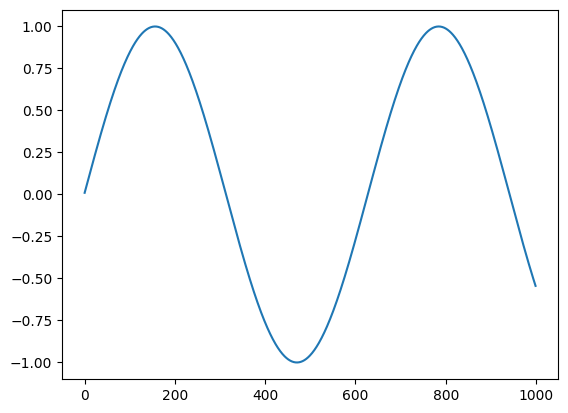

In [55]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

## Notice NOT YET disabling finer options like gradient clipping and dtype casting; expect that to take longer

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential7_ (
  Parameter sequential7_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential7_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential7_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/250], loss: 0.2602548 , 1.1255 sec | validate loss: 0.1688756 , 0.2877 sec
epoch [2/250], loss: 0.2417534 , 1.1169 sec | validate loss: 0.1577883 , 0.2748 sec
epoch [3/250], loss: 0.1852877 , 1.2584 sec | validate loss: 0.1030521 , 0.3192 sec
epoch [4/250], loss: 0.0581081 , 0.7434 sec | validate loss: 0.0015641 , 0.1847 sec
epoch [5/25

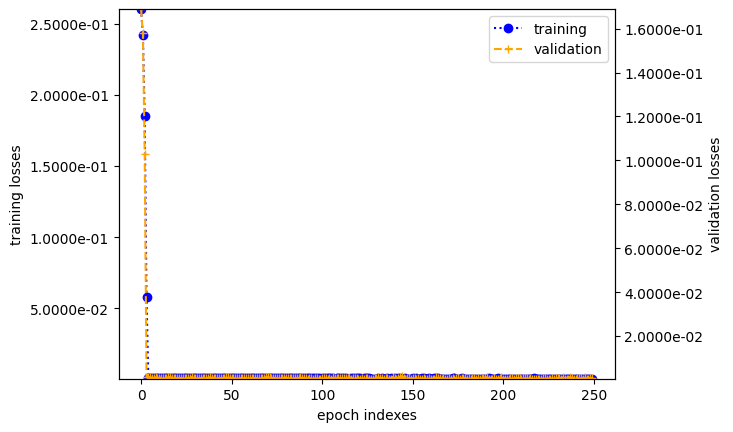

debug: testing:  tlosses min 0.0005800551214876275
debug: testing:  tlosses max 0.26025475054979325
debug: validate: vlosses min 0.0005711584253913315
debug: validate: vlosses max 0.1688756355526857


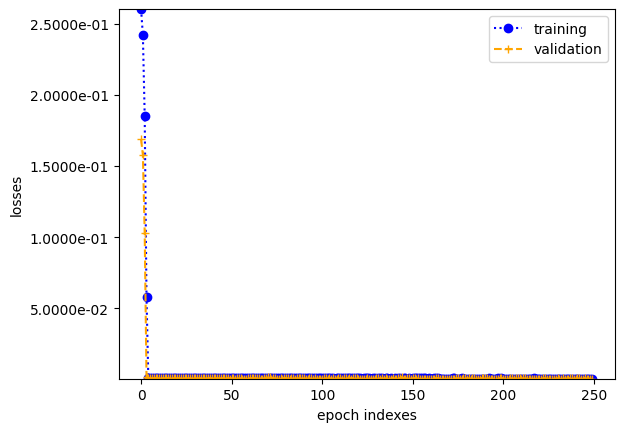

In [56]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=epochs, test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

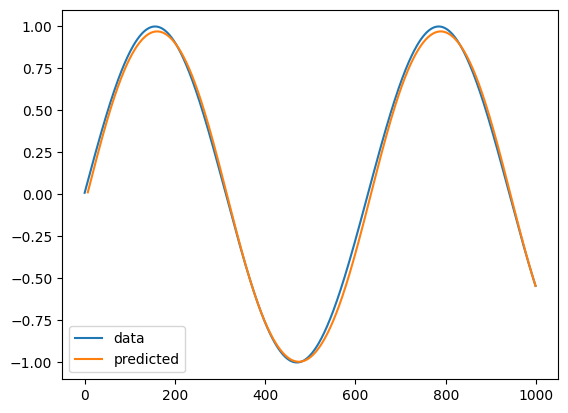

In [57]:
plot_preds_over_data(data, net, _debug=False)

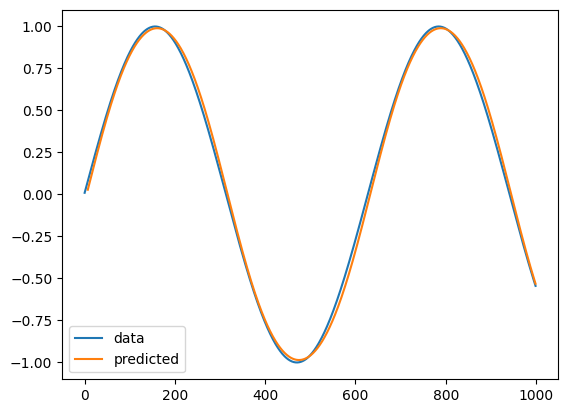

In [ ]:
# from yesterday before; had 300 epochs
plot_preds_over_data(data, net, _debug=False)

## Sine no noise, no gradient clipping

self.x.dtype: float64
self.x.dtype after astype: float32
plotting graph of the raw data points data.x


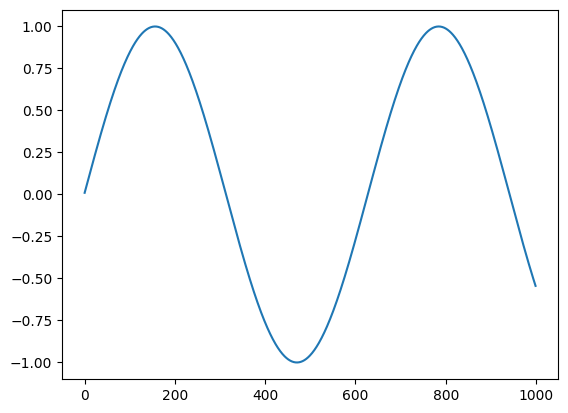

In [58]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

### Notice DID disable gradient clip but NOT the type casting

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential8_ (
  Parameter sequential8_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential8_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential8_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential8_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential8_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential8_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential8_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/250], loss: 0.2365101 , 0.5038 sec | validate loss: 0.1059124 , 0.2685 sec
epoch [2/250], loss: 0.0384457 , 0.7009 sec | validate loss: 0.0011612 , 0.2743 sec
epoch [3/250], loss: 0.0012258 , 0.6868 sec | validate loss: 0.0011132 , 0.2833 sec
epoch [4/250], loss: 0.0011482 , 0.7299 sec | validate loss: 0.0010842 , 0.2816 sec
epoch [5/25

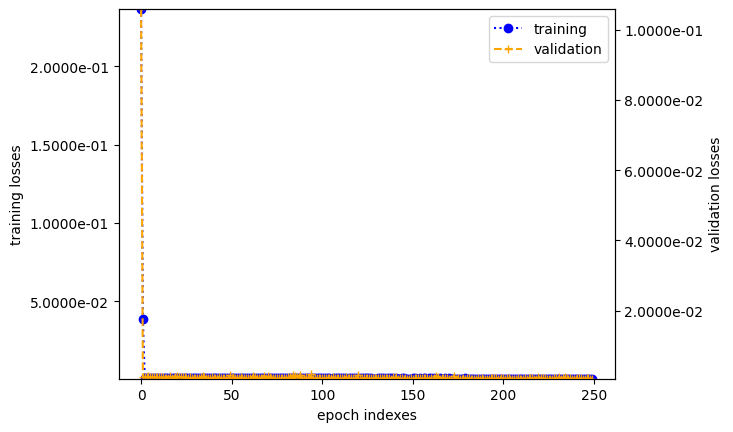

debug: testing:  tlosses min 0.0006041383603587747
debug: testing:  tlosses max 0.2365100767215093
debug: validate: vlosses min 0.0005881117218223153
debug: validate: vlosses max 0.10591240874608047


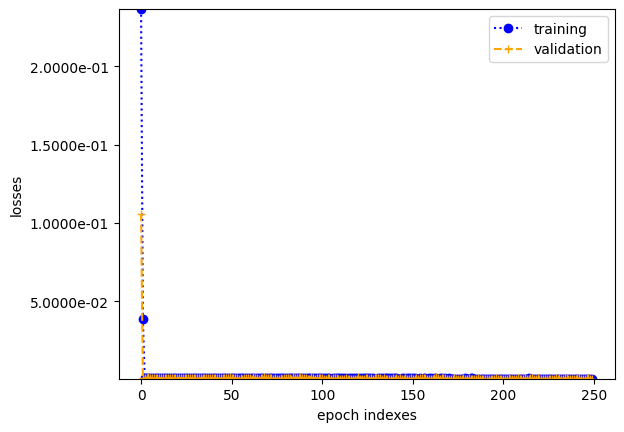

In [59]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn,
                         num_epochs=epochs, test_dataloader=val_dataloader,
                         _gradient_clip = False,
                         _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

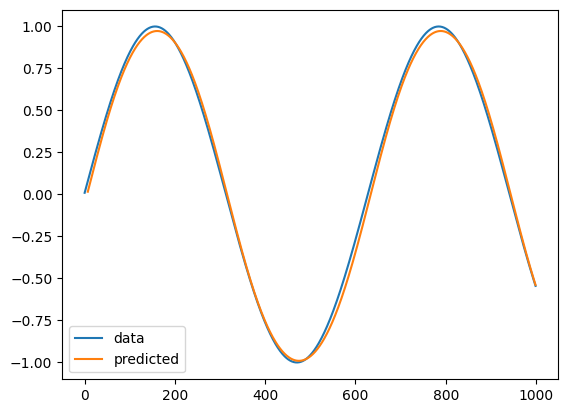

In [60]:
plot_preds_over_data(data, net, _debug=False) # this time only 250 epochs

#SimpleDataSet but changed to float32

creating basic data set
self.x.dtype: float64
self.x.dtype after astype: float32
data.tau: 7        (amount of past observations to train with)
data.batch_size: 8
data set training dataloader sample:
[array([[ 0.89567035,  1.0012759 ,  0.9427815 ,  1.0035716 ,  0.9639416 ,
         0.9826954 ,  0.9774986 ],
       [ 0.5084507 ,  0.61693364,  0.611953  ,  0.5306202 ,  0.52082443,
         0.5423722 ,  0.6140662 ],
       [ 0.5923338 ,  0.62922025,  0.49437973,  0.63123757,  0.5748676 ,
         0.49817324,  0.57773906],
       [-0.85879815, -0.83842474, -0.8673346 , -0.8315936 , -0.8688149 ,
        -0.8163786 , -0.8573979 ],
       [-0.5454637 , -0.4929002 , -0.49947616, -0.5935546 , -0.4578353 ,
        -0.5245658 , -0.46487585],
       [ 0.39028597,  0.40876505,  0.3421456 ,  0.45563552,  0.29788953,
         0.33168846,  0.2850824 ],
       [ 0.47785428,  0.50019073,  0.42093366,  0.51263094,  0.5377737 ,
         0.531612  ,  0.5084507 ],
       [ 0.13236384,  0.2037075 ,  0.185419

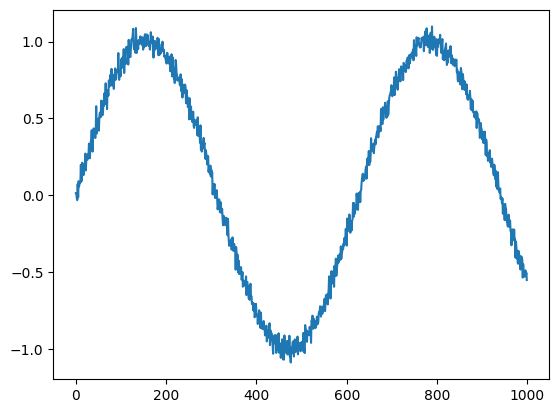

plotting another with no noise:
self.x.dtype: float64
self.x.dtype after astype: float32


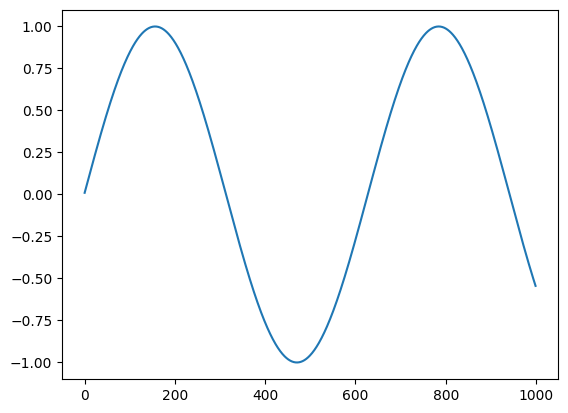

In [61]:
# import mxnet as mx
# import numpy as np
# from mxnet import npx
# # from mxnet.gluon import nn, rnn
# npx.set_np()


# adapted from https://d2l.ai/chapter_recurrent-neural-networks/sequence.html#training

class SimpleDataSet():

    def __init__(self, fn='sine', random_factor=0.2, batch_size=8, seq_length=7, num_samples=1000, num_train=600):
        '''fn = `'sine'`, `'exp'`, `'linear'`, `'quad'`, or a custom function that accepts parameters `(time, T)` where `time` is an array [1 to T+1] and `T` is `num_samples`'''
        self.batch_size = batch_size

        self.T = num_samples
        self.tau = seq_length  # past observations amount

        assert num_train <= num_samples, \
            'num_train must be <= num_samples'
        self.num_train = num_train

        self.time = np.arange(1, self.T + 1, dtype=np.float32)
        if fn == 'sine':
            ## sin wave with slight noise
            self.x = np.sin(0.01 * self.time) + np.random.randn(self.T) * 0.2 * random_factor
        elif fn == 'exp':
            ## exponential curve with slight noise
            self.x = np.power(0.1*( self.time - 0.5 + 4*random_factor*np.random.randn(self.T) ), 2)
        elif fn == 'linear':
            self.x = np.array(self.time) + 4*random_factor*np.random.randn(self.T)
        elif fn == 'quad':
            ## quadratic curve with slight noise
            self.x = self.time + np.power(self.time,2) + 4*random_factor*np.random.randn(self.T)

        else:
            self.x = fn(self.time, self.T)

        print('self.x.dtype:', self.x.dtype)
        self.x = self.x.astype('float32')
        print('self.x.dtype after astype:', self.x.dtype)


    def get_tensorloader(self, tensors, train, indices=slice(0, None))   -> mx.gluon.data.DataLoader:
        # argument `tensors` would be like [features, labels]
        tensors = tuple(a[indices] for a in tensors)
        # print('tensors:')
        # print(tensors)
        # print(f'tensors shape: {tuple(a.shape for a in tensors)}')
        # print(f'raw self.x shape: {self.x.shape}')
        # print(f'self.features shape: {self.features.shape}')
        # print(f'self.labels shape: {self.labels.shape}')
        # exit()
        dataset = mx.gluon.data.ArrayDataset(*tensors)
        return mx.gluon.data.DataLoader(dataset, self.batch_size,
                                    shuffle=train)


    def get_dataloader(self, train)   -> mx.gluon.data.DataLoader:
        features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
        self.features = np.stack(features, 1)
        self.labels = self.x[self.tau:].reshape((-1, 1))
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)



if __name__ == '__main__':
    ## Code to do testing, if this file is ran directly

    print('creating basic data set')
    data = SimpleDataSet()
    # data = SimpleDataSet(fn='quad')
    # data = SimpleDataSet(fn='sine')
    print(f'data.tau: {data.tau}        (amount of past observations to train with)')
    print(f'data.batch_size: {data.batch_size}')

    # get a training dataloader from the dataset
    dataloader = data.get_dataloader(train=True)

    # get a sample batch of X, y from the dataloader
    dataloader_sample = next(iter(dataloader))
    print('data set training dataloader sample:')
    print(dataloader_sample)
    print(f'that sample\'s [X, y] shapes: {[arr.shape for arr in dataloader_sample]}')

    # plot the raw data points
    import matplotlib.pyplot as plt
    print('plotting graph of the raw data points data.x')
    plt.plot(data.x)
    plt.show()

    print('plotting another with no noise:')
    plt.plot(SimpleDataSet('sine',random_factor=0).x)
    plt.show()

## Testing if it's faster

self.x.dtype: float64
self.x.dtype after astype: float32
plotting graph of the raw data points data.x


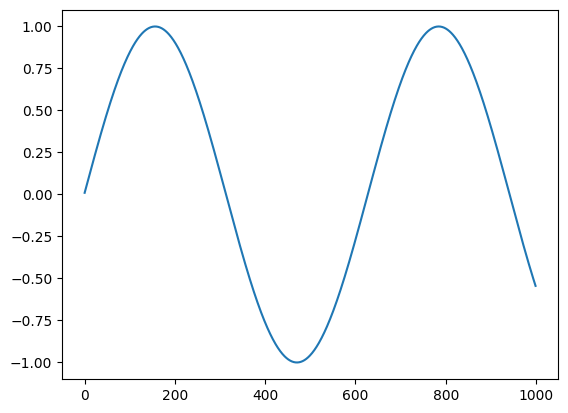

In [62]:
data = SimpleDataSet('sine', random_factor = 0)

print('plotting graph of the raw data points data.x')
plt.plot(data.x)
plt.show()

train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

## Notice USED some of the finer options like disabling gradient clipping AND no dtype casting

net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential9_ (
  Parameter sequential9_lstm0_l0_i2h_weight (shape=(128, 1), dtype=float32)
  Parameter sequential9_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential9_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential9_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential9_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential9_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential9_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/250], loss: 0.2517091 , 0.4830 sec | validate loss: 0.1345047 , 0.1838 sec
epoch [2/250], loss: 0.0999500 , 0.4603 sec | validate loss: 0.0011255 , 0.2371 sec
epoch [3/250], loss: 0.0013526 , 0.6848 sec | validate loss: 0.0012112 , 0.2380 sec
epoch [4/250], loss: 0.0012758 , 0.6716 sec | validate loss: 0.0011540 , 0.2600 sec
epoch [5/25

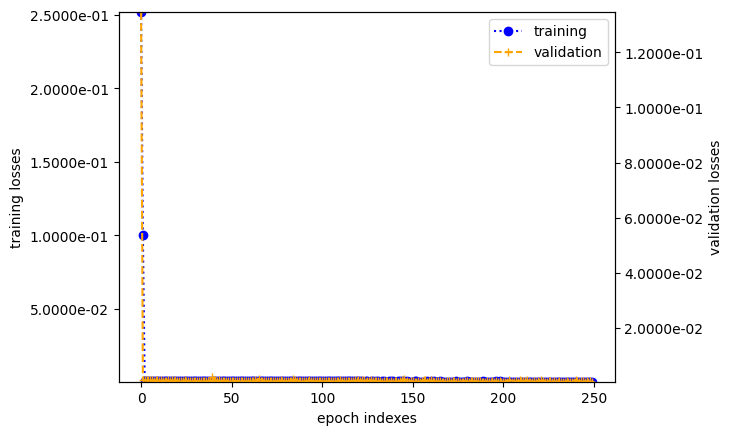

debug: testing:  tlosses min 0.000594103768041047
debug: testing:  tlosses max 0.25170910348494846
debug: validate: vlosses min 0.000573590100475485
debug: validate: vlosses max 0.13450467733084223


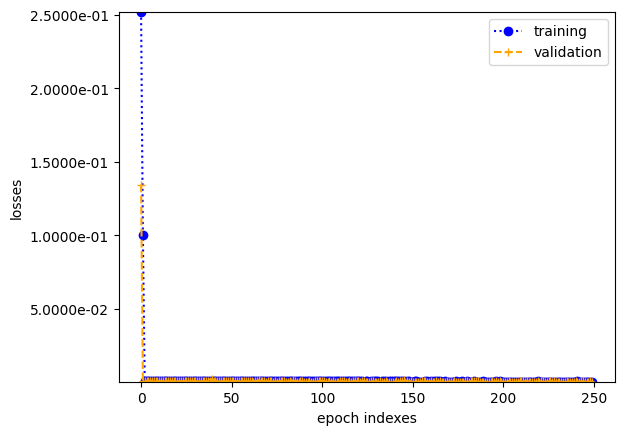

In [63]:
net = create_net(hidden_size=32, num_layers=3)

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn,
                         num_epochs=epochs, test_dataloader=val_dataloader,
                         _gradient_clip = False,
                         _dtype_cast = False,
                         _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec'.format(_timediff))

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

# plot_preds_over_data(data, net, _debug=False)

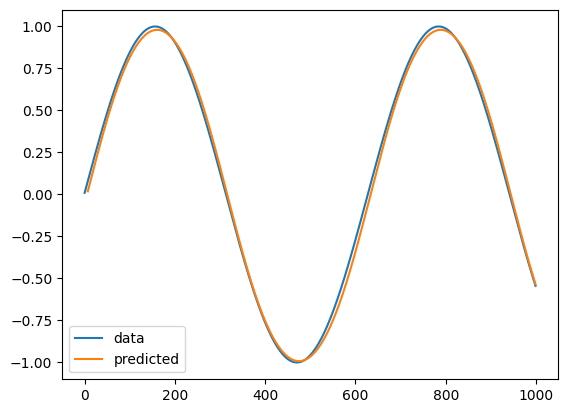

In [64]:
plot_preds_over_data(data, net, _debug=False)

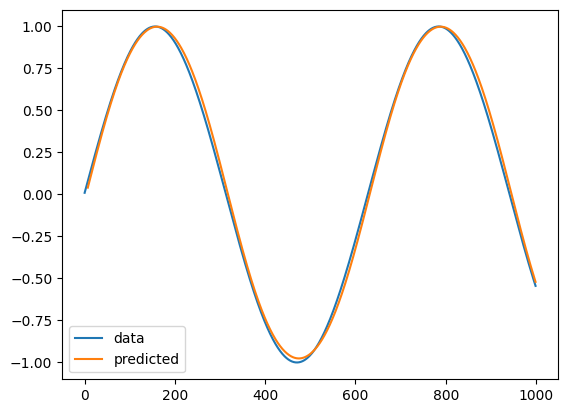

In [ ]:
# from yesterday before (then had 300 epochs not 250)
plot_preds_over_data(data, net, _debug=False)

# Now try with the previous City Dataset!

# Google drive importing


In [12]:
!ls

cuda-repo-ubuntu1804_10.0.130-1_amd64.deb		   sample_data
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!cp 'drive/MyDrive/Colab Notebooks/test.py' .
import test as import_test
print(import_test.test())

print()
!ls

hello world from test function!
None

cuda-repo-ubuntu1804_10.0.130-1_amd64.deb		   __pycache__
drive							   sample_data
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb  test.py


In [15]:
!cp 'drive/MyDrive/Colab Notebooks/jingjinji.csv' .
!cp 'drive/MyDrive/Colab Notebooks/data_filtering.py' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_jingjinji.csv' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_city_neighbors_cache.json' .
!cp 'drive/MyDrive/Colab Notebooks/filtered_pm25_stdized_info.json' .
!cp 'drive/MyDrive/Colab Notebooks/city_seq_prejoined_dict.pickle' .
!cp -r 'drive/MyDrive/Colab Notebooks/city_seqs_prejoined' ./city_seqs_prejoined
!cp -r 'drive/MyDrive/Colab Notebooks/params' ./params
!ls

print()

import pandas as pd
# from data_filtering import prepare_dataframe
df: pd.DataFrame = pd.read_csv('jingjinji.csv')
# df = prepare_dataframe(df)   # not needed, already cached

import pickle
with open('city_seq_prejoined_dict.pickle', 'rb') as f:
    city_seqs = pickle.load(f)

print(type(city_seqs), len(city_seqs))
print(type(city_seqs['三门峡市']), len(city_seqs['三门峡市']))
print(type(city_seqs['三门峡市'][0]), city_seqs['三门峡市'][0].shape)
print(type(city_seqs['三门峡市'][1]), city_seqs['三门峡市'][1].shape)

# print('first 3 of X city_seqs for city "三门峡市":')
# print(city_seqs['三门峡市'][0][:3])
print('first 3 of Y city_seqs for city "三门峡市":')
print(city_seqs['三门峡市'][1][:3])

city_seq_prejoined_dict.pickle
city_seqs_prejoined
cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
data_filtering.py
drive
filtered_city_neighbors_cache.json
filtered_jingjinji.csv
filtered_pm25_stdized_info.json
jingjinji.csv
nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
params
__pycache__
sample_data
test.py

<class 'dict'> 108
<class 'tuple'> 2
<class 'numpy.ndarray'> (625, 7, 11)
<class 'numpy.ndarray'> (625, 1)
first 3 of Y city_seqs for city "三门峡市":
[[ 4.49631602]
 [ 1.22489156]
 [-0.72741014]]


In [18]:
cities = list(set(df['cityname']))
print('len(cities):', len(cities), '  (expect 108)')  # EXPECT 108

valid_cities = cities[10:21]
test_cities = cities[31:41]
train_cities = [city for city in cities if city not in valid_cities+test_cities]

len(cities): 108   (expect 108)


In [19]:
sorted_cities = sorted(list(set(df['cityname'])))
print('len(sorted_cities):', len(sorted_cities), '  (expect 108)')  # EXPECT 108

print('unsorted:', valid_cities)
print('sorted:  ', sorted_cities[10:21])

len(sorted_cities): 108   (expect 108)
unsorted: ['苏州市', '东营市', '廊坊市', '承德市', '天津市', '温州市', '枣庄市', '烟台市', '济宁市', '宿州市', '驻马店市']
sorted:   ['北京市', '南京市', '南通市', '南阳市', '台州市', '合肥市', '吕梁市', '周口市', '咸阳市', '唐山市', '商丘市']


In [16]:
# testing saving to file
with open('test_out.txt', 'w') as f:
    f.write('hello world')
!cp 'test_out.txt' 'drive/MyDrive/Colab Notebooks/test_out.txt'

# test read from that saved file
!cp 'drive/MyDrive/Colab Notebooks/test_out.txt' .
with open('test_out.txt', 'r') as f:
    print(f.read())

hello world


# CityDataSet

undo PM 2.5 standardization to the unstandardized value

`unst = (st * std) + mean`

In [36]:
import json
with open('filtered_pm25_stdized_info.json', 'rb') as f:
    _pm25_stdized = json.load(f)
pm25_std, pm25_mean = _pm25_stdized['pm25_std'], _pm25_stdized['pm25_mean']

def undo_pm25_standardization(standardized_pm25):
    '''undo standardization for pm2.5 values (within calculation precision)
    \nWhen stardardizing: `st = (unst - mean) / std`
    therefore: `unst = (st * std) + mean`'''
    return (standardized_pm25 * pm25_std) + pm25_mean

## yes, casting to float32

In [37]:
class CityDataSet:

    def __init__(self, city_seqs_dict: dict[tuple[np.ndarray, np.ndarray]], train_city_list, validate_city_list, batch_size = 8):
        self.batch_size = batch_size
        # concatenate the training city's sequences into X, y
        trainX, trainy = [], []
        for city in train_city_list:
            cX, cy = city_seqs_dict[city]
            trainX.append(cX)
            trainy.append(cy)
        self.trainX: np.ndarray = np.concatenate(trainX, axis=0)
        self.trainy: np.ndarray = np.concatenate(trainy, axis=0)
        # concatenate the validation city's sequences into X, y
        validX, validy = [], []
        for city in validate_city_list:
            cX, cy = city_seqs_dict[city]
            validX.append(cX)
            validy.append(cy)
        self.validX: np.ndarray = np.concatenate(validX, axis=0)
        self.validy: np.ndarray = np.concatenate(validy, axis=0)

        # make a dataloader out of these
        print("CityDataSet: concatenated train X.shape:", self.trainX.shape)  # feature sequences
        print("CityDataSet: concatenated train y.shape:", self.trainy.shape)  # labels
        print("CityDataSet: concatenated validate X.shape:", self.validX.shape)  # feature sequences
        print("CityDataSet: concatenated validate y.shape:", self.validy.shape)  # labels


        print('self.trainX.dtype:', self.trainX.dtype)
        print('self.trainy.dtype:', self.trainy.dtype)
        print('self.validX.dtype:', self.validX.dtype)
        print('self.validy.dtype:', self.validy.dtype)

        self.trainX = self.trainX.astype('float32')
        self.trainy = self.trainy.astype('float32')
        self.validX = self.validX.astype('float32')
        self.validy = self.validy.astype('float32')

        print('self.trainX.dtype after astype:', self.trainX.dtype)
        print('self.trainy.dtype after astype:', self.trainy.dtype)
        print('self.validX.dtype after astype:', self.validX.dtype)
        print('self.validy.dtype after astype:', self.validy.dtype)


    def concat_all_X(self):
        return np.concatenate((self.trainX, self.validX))
    def concat_all_y(self):
        return np.concatenate((self.trainy, self.validy))


    def get_dataloader(self, train, last_batch = 'keep',
                       _batch_size_override = None, _dataloader_kwargs = {}) -> mx.gluon.data.DataLoader:

        # [feature seqs, labels]
        if train=='both':
          shuffle = False
          tensors = [self.concat_all_X(), self.concat_all_y()]
        else:
          shuffle = bool(train)
          tensors = [self.trainX, self.trainy] if train else [self.validX, self.validy]
        dataset = mx.gluon.data.ArrayDataset(*tensors)  # *[feature seqs, labels]
        # shuffle = (self.shuffle if _shuffle_override is None else bool(_shuffle_override))
        batch_size = (self.batch_size if _batch_size_override is None else int(_batch_size_override))
        return mx.gluon.data.DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, last_batch=last_batch, **_dataloader_kwargs)


# Feeding the 11-feature city data through a net

### CityDataSet does PM 2.5 as the Y to predict

CityDataSet: concatenated train X.shape: (52951, 7, 11)
CityDataSet: concatenated train y.shape: (52951, 1)
CityDataSet: concatenated validate X.shape: (6672, 7, 11)
CityDataSet: concatenated validate y.shape: (6672, 1)
self.trainX.dtype: float64
self.trainy.dtype: float64
self.validX.dtype: float64
self.validy.dtype: float64
self.trainX.dtype after astype: float32
self.trainy.dtype after astype: float32
self.validX.dtype after astype: float32
self.validy.dtype after astype: float32
plotting graph of the (standardized) training y (pm25) data points traindata.y
plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y


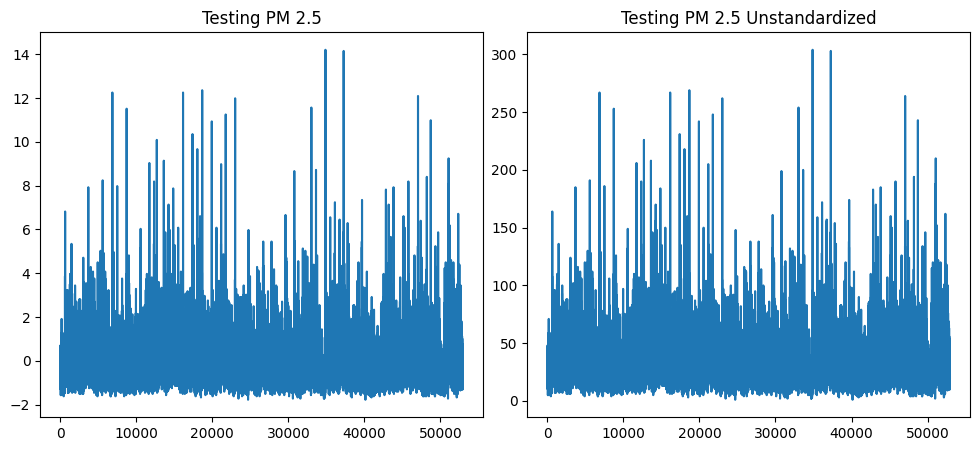

plotting graph of the (std) validation y (pm25) data points valdata.y


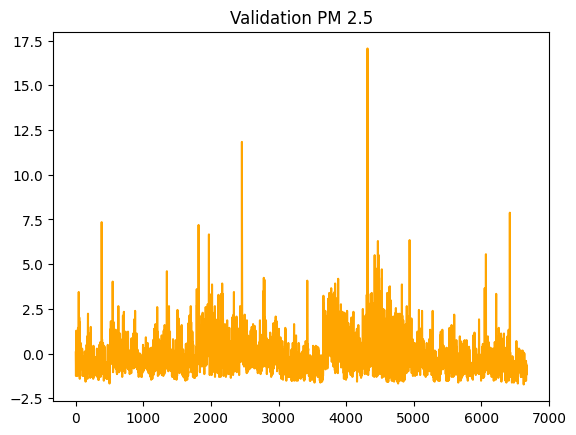

In [67]:
# traindata = CityDataSet(city_seqs, train_cities, train=True)
# valdata = CityDataSet(city_seqs, valid_cities, train=False)
data = CityDataSet(city_seqs, train_cities, valid_cities)

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

print('plotting graph of the (standardized) training y (pm25) data points traindata.y')
# axes1.plot(traindata.y)
axes1.plot(data.trainy)
axes1.set_title('Testing PM 2.5')
# plt.show()
print('plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y')
# axes2.plot([undo_pm25_standardization(y) for y in traindata.y])
axes2.plot([undo_pm25_standardization(y) for y in data.trainy])
axes2.set_title('Testing PM 2.5 Unstandardized')
plt.show()

print('plotting graph of the (std) validation y (pm25) data points valdata.y')
# plt.plot(valdata.y, color='orange')
plt.plot(data.validy, color='orange')
plt.title('Validation PM 2.5')
plt.show()

# plt.plot(np.concatenate((data.trainy,data.validy)), color='orange')
# plt.title('All PM 2.5')
# plt.show()

# train_dataloader: gluon.data.DataLoader = traindata.get_dataloader()
# val_dataloader: gluon.data.DataLoader = valdata.get_dataloader()
train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

#### test_GPU_net_1

gpu(0)
net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential10_ (
  Parameter sequential10_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential10_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential10_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/100], loss: 0.1874296 , 68.6275 sec | validate loss: 0.1190461 , 2.7637 sec
epoch [2/100], loss: 0.0812416 , 68.2970 sec | validate loss: 0.1130271 , 2.8638 sec
epoch [3/100], loss: 0.0729401 , 69.1040 sec | validate loss: 0.0996603 , 3.3776 sec
epoch [4/100], loss: 0.0686626 , 68.3689 sec | validate loss: 0.0962359 , 2.

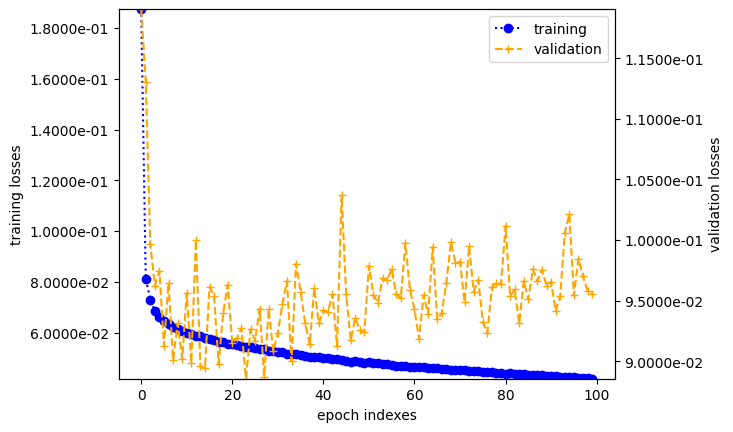

debug: testing:  tlosses min 0.04180994179915321
debug: testing:  tlosses max 0.18742955894862875
debug: validate: vlosses min 0.08856559722760818
debug: validate: vlosses max 0.1190460781551165


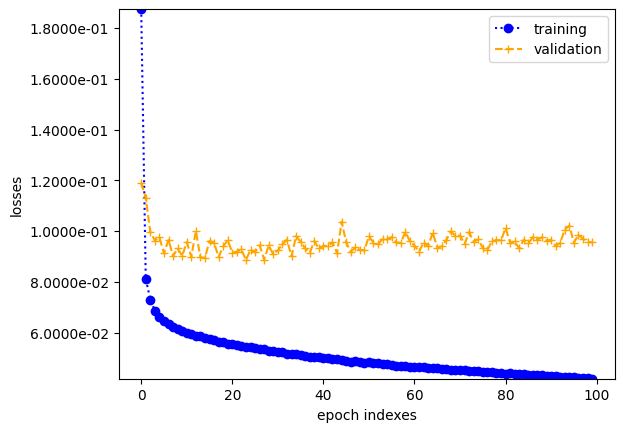

In [68]:
net = create_net(hidden_size=32, num_layers=3)

print(ctx)  # make sure it's gpu

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=100,
                         _dtype_cast = False,
                        #  _gradient_clip = False,
                         test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = "params/test_GPU_net_1.params"
net.save_parameters(file_name)
# copy out to drive and back
!cp 'params/test_GPU_net_1.params' 'drive/MyDrive/Colab Notebooks/params/test_GPU_net_1.params'
!cp 'drive/MyDrive/Colab Notebooks/params/test_GPU_net_1.params' ./params
print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

#--------

# plot_preds_over_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=False)

#### ^ that used to take about 90-100 sec/epoch *before* I trimmed stuff out of train(...) and today it only took ~ 70 sec/epoch!!

(these below results graphed are NEW, with the GPU RUN) (still 100 epochs, same number)

debug: testing:  tlosses min 0.04180994179915321
debug: testing:  tlosses max 0.18742955894862875
debug: validate: vlosses min 0.08856559722760818
debug: validate: vlosses max 0.1190460781551165


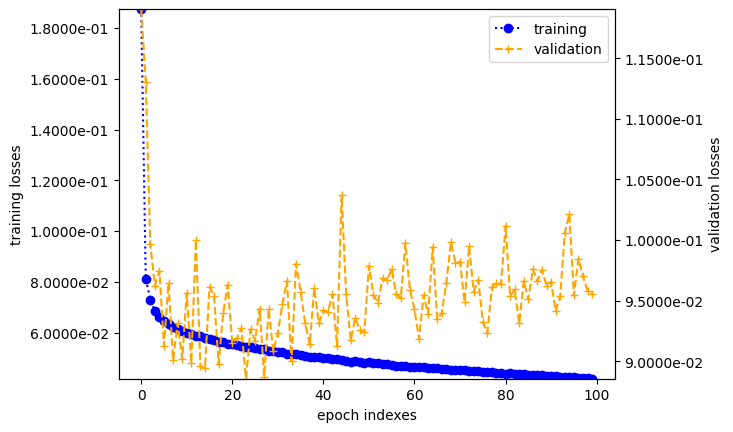

debug: testing:  tlosses min 0.04180994179915321
debug: testing:  tlosses max 0.18742955894862875
debug: validate: vlosses min 0.08856559722760818
debug: validate: vlosses max 0.1190460781551165


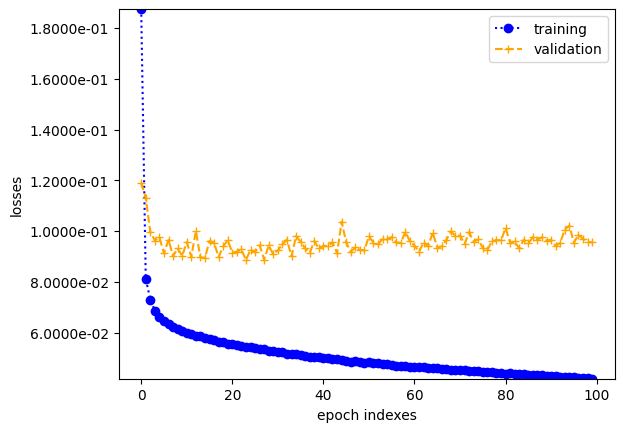

In [69]:
# plot losses (NEW, with the GPU RUN) (still 100 epochs, same number)
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

(these below results graphed were OLDER, COPIED FROM THE CPU RUN in the OTHER NOTEBOOK)

debug: testing:  tlosses min 0.04483523347648932
debug: testing:  tlosses max 0.20417019664321906
debug: validate: vlosses min 0.00737874969580691
debug: validate: vlosses max 0.011497947993216424


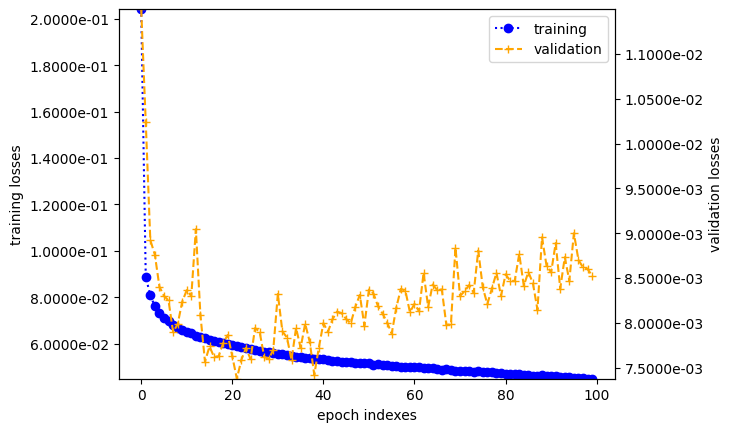

debug: testing:  tlosses min 0.04483523347648932
debug: testing:  tlosses max 0.20417019664321906
debug: validate: vlosses min 0.00737874969580691
debug: validate: vlosses max 0.011497947993216424


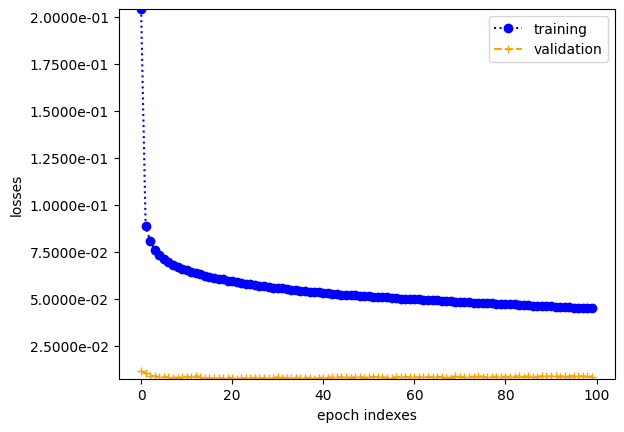

In [ ]:
# plot losses (these results were OLDER, COPIED FROM THE CPU RUN in the OTHER NOTEBOOK)
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

^^ (note again the graphed results ABOVE were OLDER, maybe even before I fixed the validation scaling issue! so the relative trend is what matters more here)

(these below results graphed are NEW, with the GPU RUN) (still 100 epochs, same number)

len(data_y_points), _input_len + len(pred_y): 59623 , 59630
debug: len pred_y:    59623
debug: len _px range: 59623
debug: first 8 of data_y_points: [array([-1.1495295], dtype=float32), array([0.16959333], dtype=float32), array([-0.0414663], dtype=float32), array([-0.5691154], dtype=float32), array([0.380653], dtype=float32), array([0.5389477], dtype=float32), array([-0.09423121], dtype=float32), array([-0.67464525], dtype=float32)]
debug: first 8 of pred_y:        [array(-1.0142128, ctx=gpu(0)), array(0.06640249, ctx=gpu(0)), array(0.0748015, ctx=gpu(0)), array(-0.27692372, ctx=gpu(0)), array(0.5495679, ctx=gpu(0)), array(0.76887345, ctx=gpu(0)), array(0.10040027, ctx=gpu(0)), array(-0.37741822, ctx=gpu(0))]
debug: last 8 of  data_y_points: [array([-0.5691154], dtype=float32), array([-0.9912347], dtype=float32), array([-1.2022943], dtype=float32), array([-1.0967646], dtype=float32), array([-0.8857049], dtype=float32), array([-0.67464525], dtype=float32), array([-0.67464525], dtype=flo

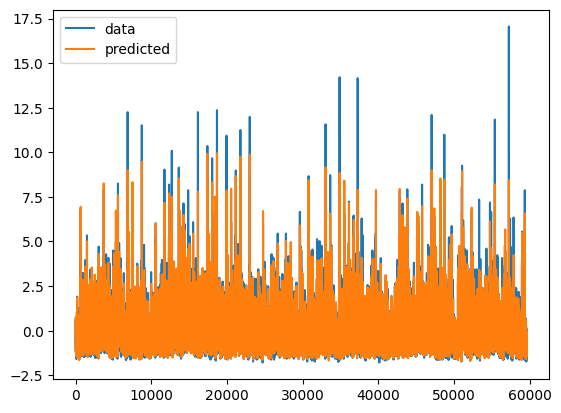

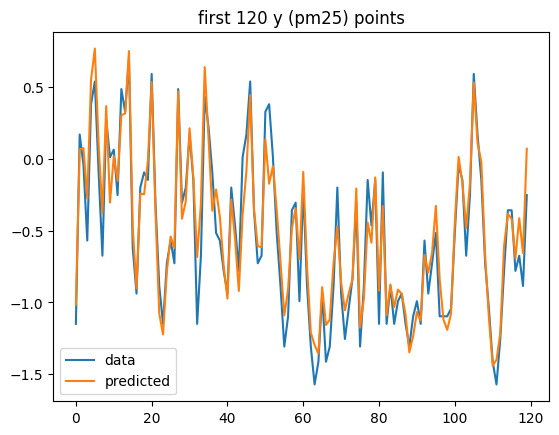

In [70]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

# extra plot of just the first 100 y (pm25) points, to see them clearer
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25) points')

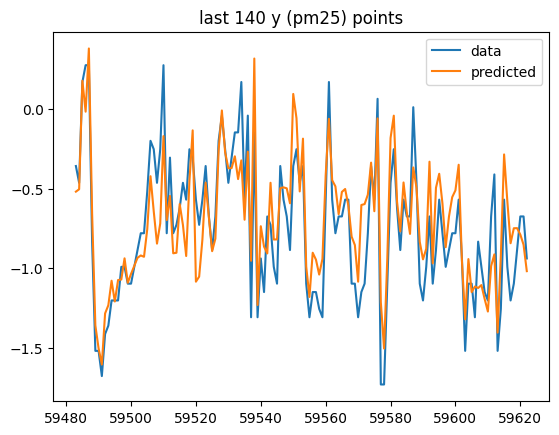

In [71]:
# # extra plot of just the last 140 y (pm25) points, to see them clearer (these should be the validation ones)
plot_preds_multivar_sliced(slice(-140,None), pred_y, true_y, input_len,
        _plt_title='last 140 y (pm25) points')

(these below results graphed were OLDER, COPIED FROM THE CPU RUN in the OTHER NOTEBOOK)

len(data_y_points), _input_len + len(pred_y): 59804 , 59811
debug: len pred_y:    59804
debug: len _px range: 59804
debug: first 8 of data_y_points: [array([0.69724245]), array([1.01383191]), array([-0.35805577]), array([-0.0414663]), array([1.33042138]), array([1.11936173]), array([0.64447754]), array([0.22235825])]
debug: first 8 of pred_y:        [array(0.71969664), array(1.386162), array(-0.28495926), array(-0.43803406), array(0.43061396), array(-0.08283925), array(0.06557685), array(0.00803006)]
debug: last 8 of  data_y_points: [array([0.48618281]), array([-0.30529086]), array([-0.62188032]), array([-0.72741014]), array([-0.67464523]), array([-0.67464523]), array([-0.67464523]), array([-0.78017505])]
debug: last 8 of  pred_y:        [array(0.4817813), array(-0.06847155), array(-0.63309836), array(-0.6063075), array(-0.33377254), array(-0.33878064), array(-0.45593548), array(-0.6510607)]
debug: last 8 of _px:  [59796 59797 59798 59799 59800 59801 59802 59803]


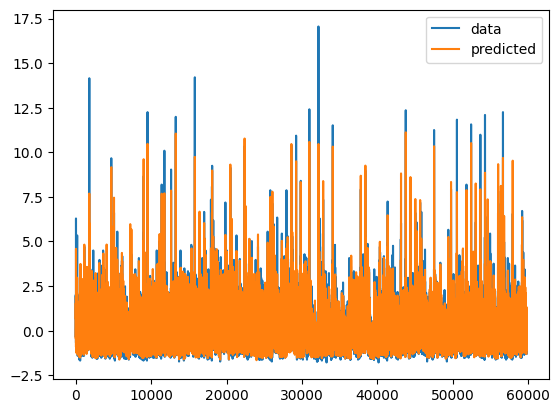

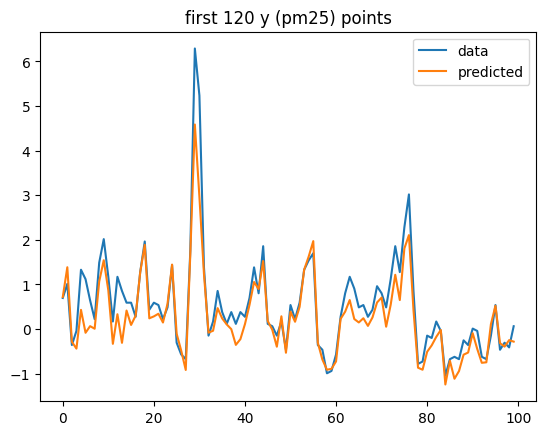

In [ ]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

# # extra plot of just the first 100 y (pm25) points, to see them clearer
# _FIRST_N = 100
# axes = plt.gca()
# _px = input_len + np.arange(len(pred_y))  # offset pred's x for graph plot
# axes.plot(range(_FIRST_N), true_y[:_FIRST_N], label='data')
# axes.plot(_px[:_FIRST_N-input_len], pred_y[:_FIRST_N-input_len], label='predicted')
# plt.legend()
# plt.show()
# plot_preds_multivar_firstN(120, pred_y, true_y, input_len,
#         _plt_title='first 120 y (pm25) points')
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25) points')

### test_GPU_net_2; using batch size 32,

CityDataSet: concatenated train X.shape: (52948, 7, 11)
CityDataSet: concatenated train y.shape: (52948, 1)
CityDataSet: concatenated validate X.shape: (6765, 7, 11)
CityDataSet: concatenated validate y.shape: (6765, 1)
self.trainX.dtype: float64
self.trainy.dtype: float64
self.validX.dtype: float64
self.validy.dtype: float64
self.trainX.dtype after astype: float32
self.trainy.dtype after astype: float32
self.validX.dtype after astype: float32
self.validy.dtype after astype: float32
plotting graph of the (standardized) training y (pm25) data points traindata.y
plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y


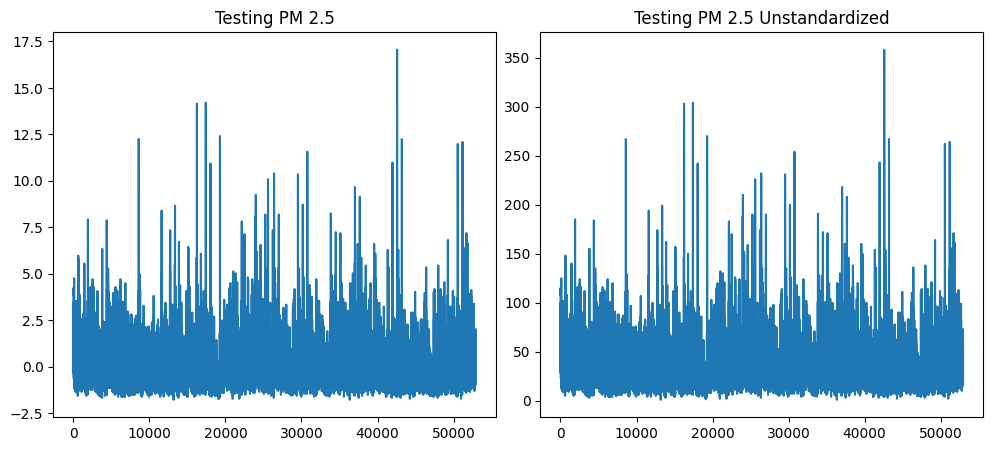

plotting graph of the (std) validation y (pm25) data points valdata.y


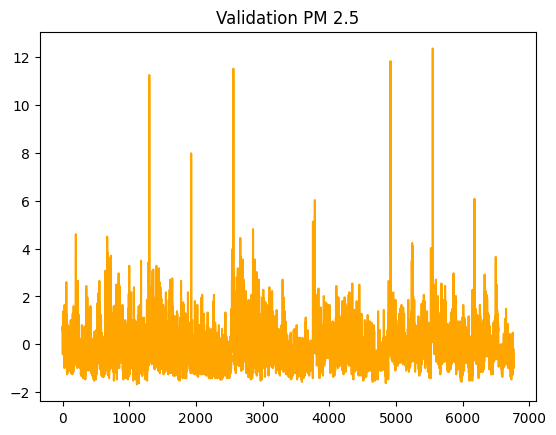

In [38]:
# traindata = CityDataSet(city_seqs, train_cities, train=True)
# valdata = CityDataSet(city_seqs, valid_cities, train=False)
data = CityDataSet(city_seqs, train_cities, valid_cities,
                   batch_size = 32)

fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)

print('plotting graph of the (standardized) training y (pm25) data points traindata.y')
# axes1.plot(traindata.y)
axes1.plot(data.trainy)
axes1.set_title('Testing PM 2.5')
# plt.show()
print('plotting graph of the UN-STARDARDIZED training y (pm25) data points traindata.y')
# axes2.plot([undo_pm25_standardization(y) for y in traindata.y])
axes2.plot([undo_pm25_standardization(y) for y in data.trainy])
axes2.set_title('Testing PM 2.5 Unstandardized')
plt.show()

print('plotting graph of the (std) validation y (pm25) data points valdata.y')
# plt.plot(valdata.y, color='orange')
plt.plot(data.validy, color='orange')
plt.title('Validation PM 2.5')
plt.show()

# plt.plot(np.concatenate((data.trainy,data.validy)), color='orange')
# plt.title('All PM 2.5')
# plt.show()

# train_dataloader: gluon.data.DataLoader = traindata.get_dataloader()
# val_dataloader: gluon.data.DataLoader = valdata.get_dataloader()
train_dataloader: gluon.data.DataLoader = data.get_dataloader(train=True)
val_dataloader: gluon.data.DataLoader = data.get_dataloader(train=False)

gpu(0)
net:
Sequential(
  (0): LSTM(-1 -> 32, NTC, num_layers=3)
  (1): Dense(-1 -> 1, linear)
)
weight params: sequential0_ (
  Parameter sequential0_lstm0_l0_i2h_weight (shape=(128, 11), dtype=float32)
  Parameter sequential0_lstm0_l0_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l1_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_i2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_lstm0_l2_h2h_weight (shape=(128, 32), dtype=float32)
  Parameter sequential0_dense0_weight (shape=(1, 224), dtype=float32)
)
epoch [1/100], loss: 0.3794190 , 17.0432 sec | validate loss: 0.3893889 , 0.7142 sec
epoch [2/100], loss: 0.3236829 , 17.2763 sec | validate loss: 0.3360580 , 1.1415 sec
epoch [3/100], loss: 0.2712601 , 17.9458 sec | validate loss: 0.2676409 , 0.7014 sec
epoch [4/100], loss: 0.2046943 , 16.9774 sec | validate loss: 0.1903264 , 0.6955 sec

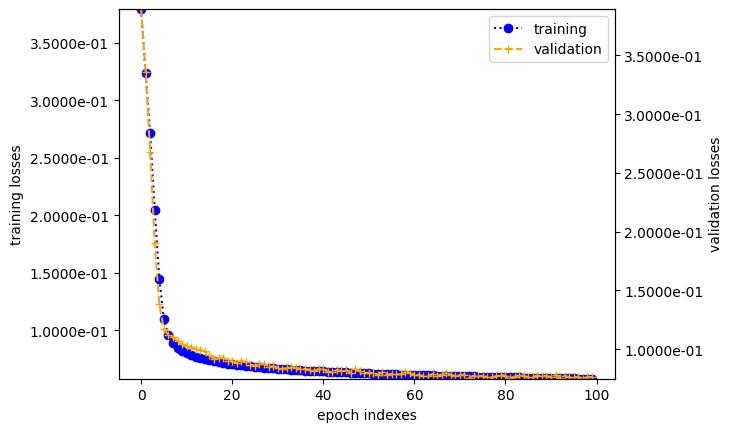

debug: testing:  tlosses min 0.05782324507314813
debug: testing:  tlosses max 0.37941897216610315
debug: validate: vlosses min 0.07489549489428271
debug: validate: vlosses max 0.3893889383289893


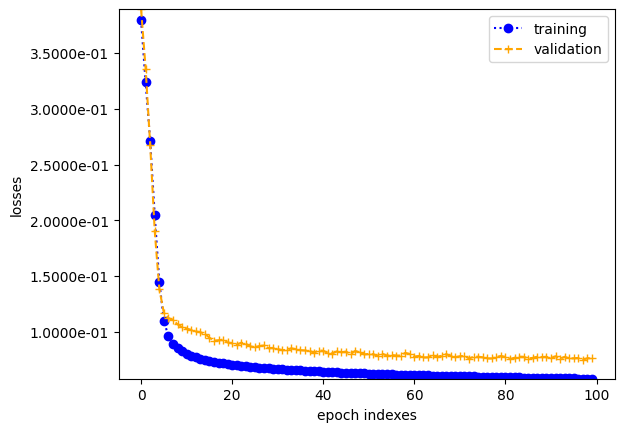

In [39]:
net = create_net(hidden_size=32, num_layers=3)

print(ctx)  # make sure it's gpu

net.initialize(mx.init.Xavier(), ctx=ctx)

print('net:');  print(net)

## trainer for net
trainer = create_trainer(net)
loss_fn = create_loss_fn()

## train, test
_stime = time.time()
tlosses, vlosses = train(net, trainer, train_dataloader, loss_fn, num_epochs=100,
                         _dtype_cast = False,
                        #  _gradient_clip = False,
                         test_dataloader=val_dataloader, _verbosedbg=False)
_timediff = time.time() - _stime
print('total time diff for train() call, all epochs: {:.4f} sec (hh:mm:ss {})'.format(_timediff, secs_to_hhmmss(_timediff)))

# save net params in case Google Colab session ends
file_name = "params/test_GPU_net_2.params"
net.save_parameters(file_name)
# copy out to drive and back
!cp 'params/test_GPU_net_2.params' 'drive/MyDrive/Colab Notebooks/params/test_GPU_net_2.params'
!cp 'drive/MyDrive/Colab Notebooks/params/test_GPU_net_2.params' ./params
print(f'saved parameters to "{file_name}"')

# plot losses
plt_losses(tlosses, vlosses)
plt_losses(tlosses, vlosses, split_axis=False)

#--------

# plot_preds_over_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=False)

len(data_y_points), _input_len + len(pred_y): 59713 , 59720
debug: len pred_y:    59713
debug: len _px range: 59713
debug: first 8 of data_y_points: [array([3.863137], dtype=float32), array([4.2324915], dtype=float32), array([0.75000733], dtype=float32), array([0.961067], dtype=float32), array([1.8053056], dtype=float32), array([1.8580705], dtype=float32), array([0.27512315], dtype=float32), array([0.59171265], dtype=float32)]
debug: first 8 of pred_y:        [array(2.8846536, ctx=gpu(0)), array(3.4983385, ctx=gpu(0)), array(1.0151273, ctx=gpu(0)), array(1.3280354, ctx=gpu(0)), array(1.6668065, ctx=gpu(0)), array(1.5703453, ctx=gpu(0)), array(0.24807176, ctx=gpu(0)), array(0.6017494, ctx=gpu(0))]
debug: last 8 of  data_y_points: [array([-0.4635856], dtype=float32), array([-0.9912347], dtype=float32), array([-0.67464525], dtype=float32), array([-0.35805577], dtype=float32), array([-0.19976103], dtype=float32), array([-0.4635856], dtype=float32), array([-0.35805577], dtype=float32), arra

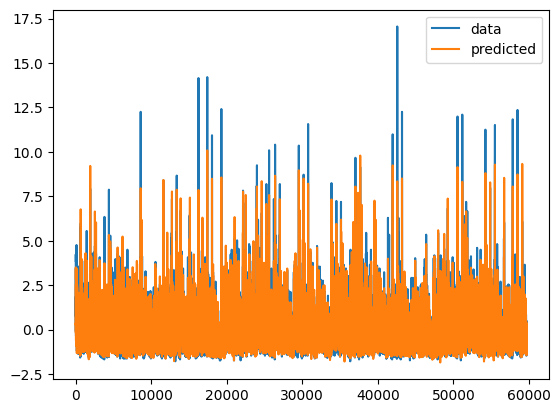

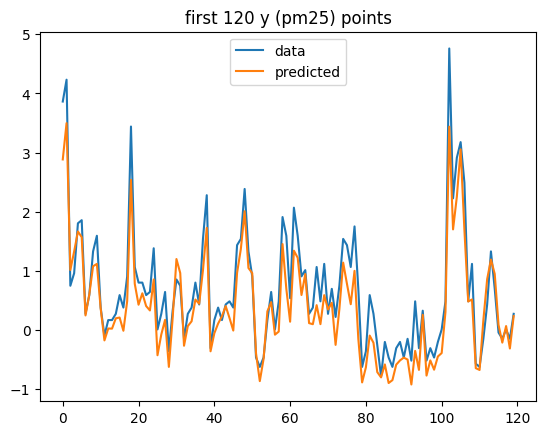

In [40]:
pred_y, true_y, input_len = \
plot_preds_multivar_dataloader(data.get_dataloader(train='both'), data.concat_all_y(), net, _debug=True)

# extra plot of just the first 100 y (pm25) points, to see them clearer
plot_preds_multivar_sliced(slice(0,120), pred_y, true_y, input_len,
        _plt_title='first 120 y (pm25) points')

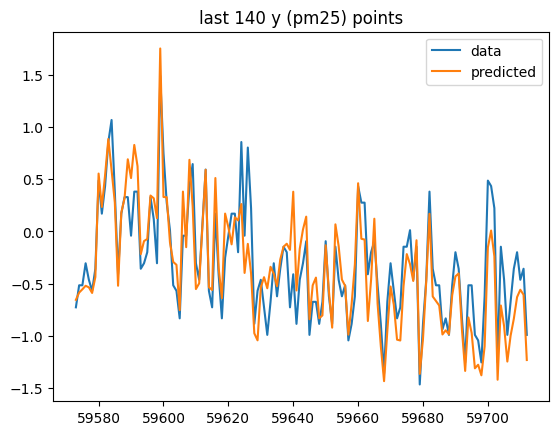

In [41]:
# # extra plot of just the last 140 y (pm25) points, to see them clearer (these should be the validation ones)
plot_preds_multivar_sliced(slice(-140,None), pred_y, true_y, input_len,
        _plt_title='last 140 y (pm25) points')